In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.datasets import make_gaussian_quantiles, make_moons, make_blobs, make_biclusters, make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.inspection import DecisionBoundaryDisplay

In [6]:
# Configuration options
num_samples_total = 500
gaussian_mean = (0,0)
num_classes_total = 2
num_features_total = 2
random_state = 47
noise = 0.25
factor = 0.1

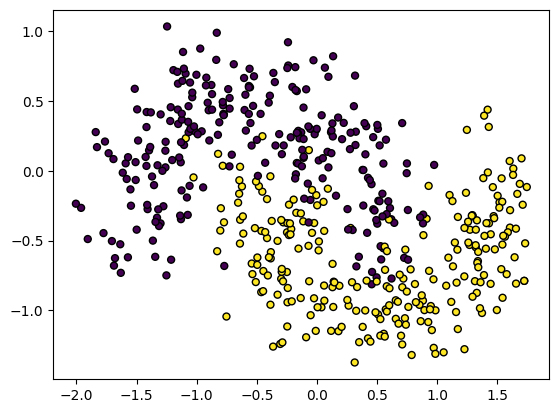

In [7]:
# Generate data
X, y = make_moons(n_samples=num_samples_total, noise=noise, random_state=random_state)
X = X - 0.5
plt.scatter(X[:, 0], X[:,1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

In [8]:
test_size = 0.25
kernel = ['linear','poly','poly','rbf','rbf','rbf']
degree = [0,2,3,0,0,0]
gamma = [0,.5,.5,.1,.5,1]
cm_list = []
f1_list = []

def plot_decision_boundaries(test_size=test_size, kernel=kernel, degree=degree, gamma=gamma):
    cm_list = []
    f1_list = []

    fig, axs = plt.subplots(2, 3, figsize=(18,10))
    axs = axs.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    for i in range(len(kernel)):
        
        svm = SVC(random_state=random_state, kernel=kernel[i], gamma=gamma[i], degree=degree[i])
        svm = svm.fit(X_train, y_train)
        predictions = svm.predict(X_test)
        common_params = {"estimator": svm, "X": X, "ax": axs[i]}
        cm = confusion_matrix(y_test, predictions, labels=svm.classes_)
        f1 = f1_score(y_test, predictions)
        cm_list.append(cm)
        f1_list.append(f1)
    
        axs[i].scatter(
            svm.support_vectors_[:, 0],
            svm.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="r",
        )
        axs[i].scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
        
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,
        )
        
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="decision_function",
            plot_method="contour",
            levels=[-1, 0, 1],
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
        )
    
    for i in range(len(kernel)):
        if kernel[i] == 'linear':
            axs[i].set_title('SVM using '+kernel[i]+' kernel')
        elif kernel[i] == 'poly':
            axs[i].set_title('SVM using '+kernel[i]+' kernel'+' (degree' + ' = ' + str(degree[i])+')')
        elif kernel[i] == 'rbf':
            axs[i].set_title('SVM using '+kernel[i]+' kernel'+' (' + r'$\gamma$' + ' = ' + str(gamma[i])+')')

    plt.show()
    
    return cm_list, f1_list

In [9]:
def plot_confusion_matrices(cm_list, f1_list):
    
    fig, axs = plt.subplots(2, 3, figsize=(18,10))
    axs = axs.ravel()
    
    for i in range(len(cm_list)):
    
        ConfusionMatrixDisplay(confusion_matrix = cm_list[i], display_labels=svm.classes_).plot(ax = axs[i])
        axs[i].set_title('SVM using '+kernel[i]+' kernel'+' (' + r'$\gamma$' + ' = ' + str(gamma[i])+')' + '\nF1 score: ' + str(round(f1_list[i],2)))
        axs[0].set_title('SVM using '+kernel[0]+' kernel'+'\nF1 score: ' + str(round(f1_list[0],2)))

    plt.show()

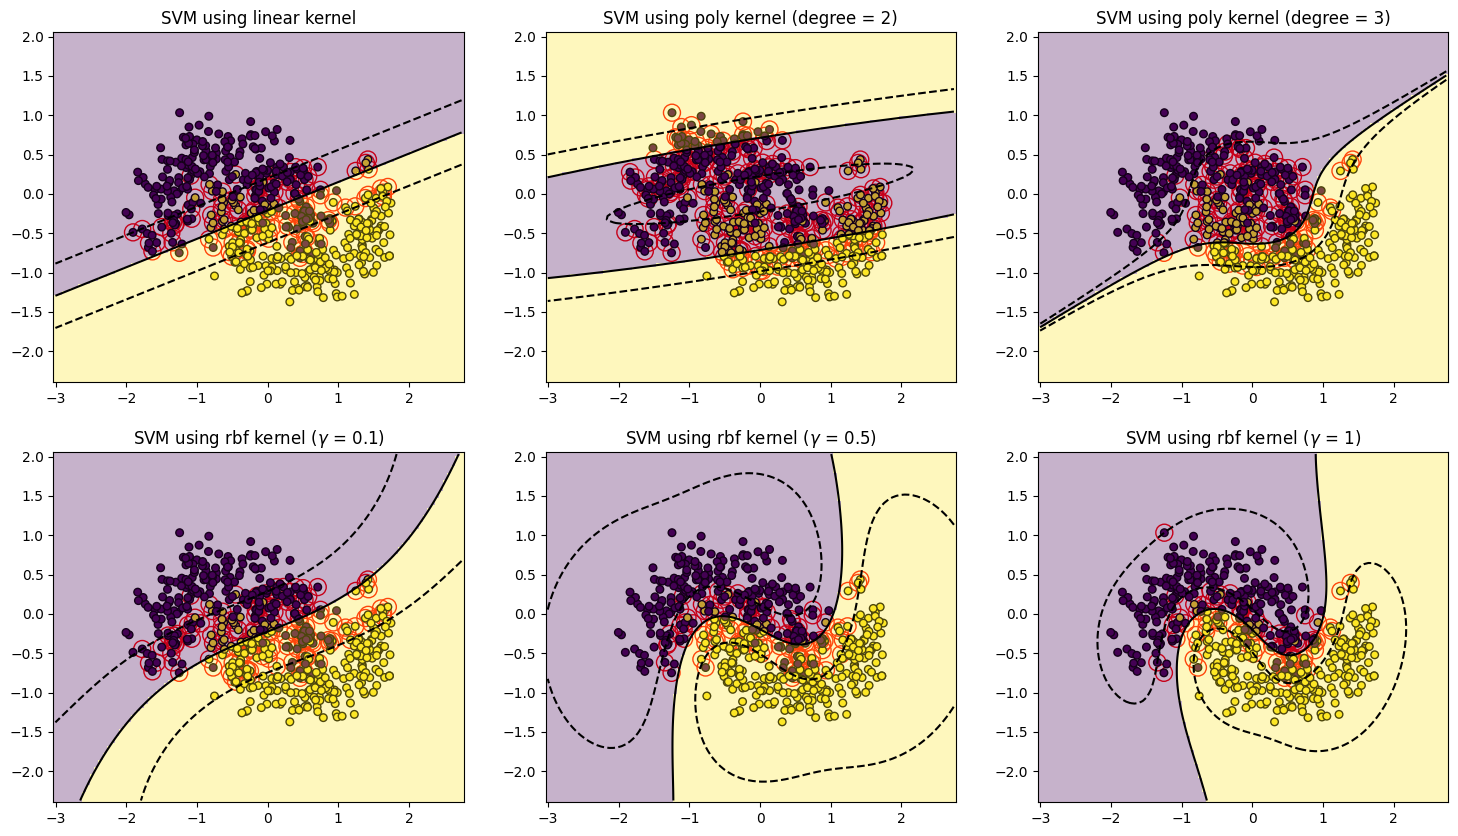

In [10]:
cm_list, f1_list = plot_decision_boundaries()

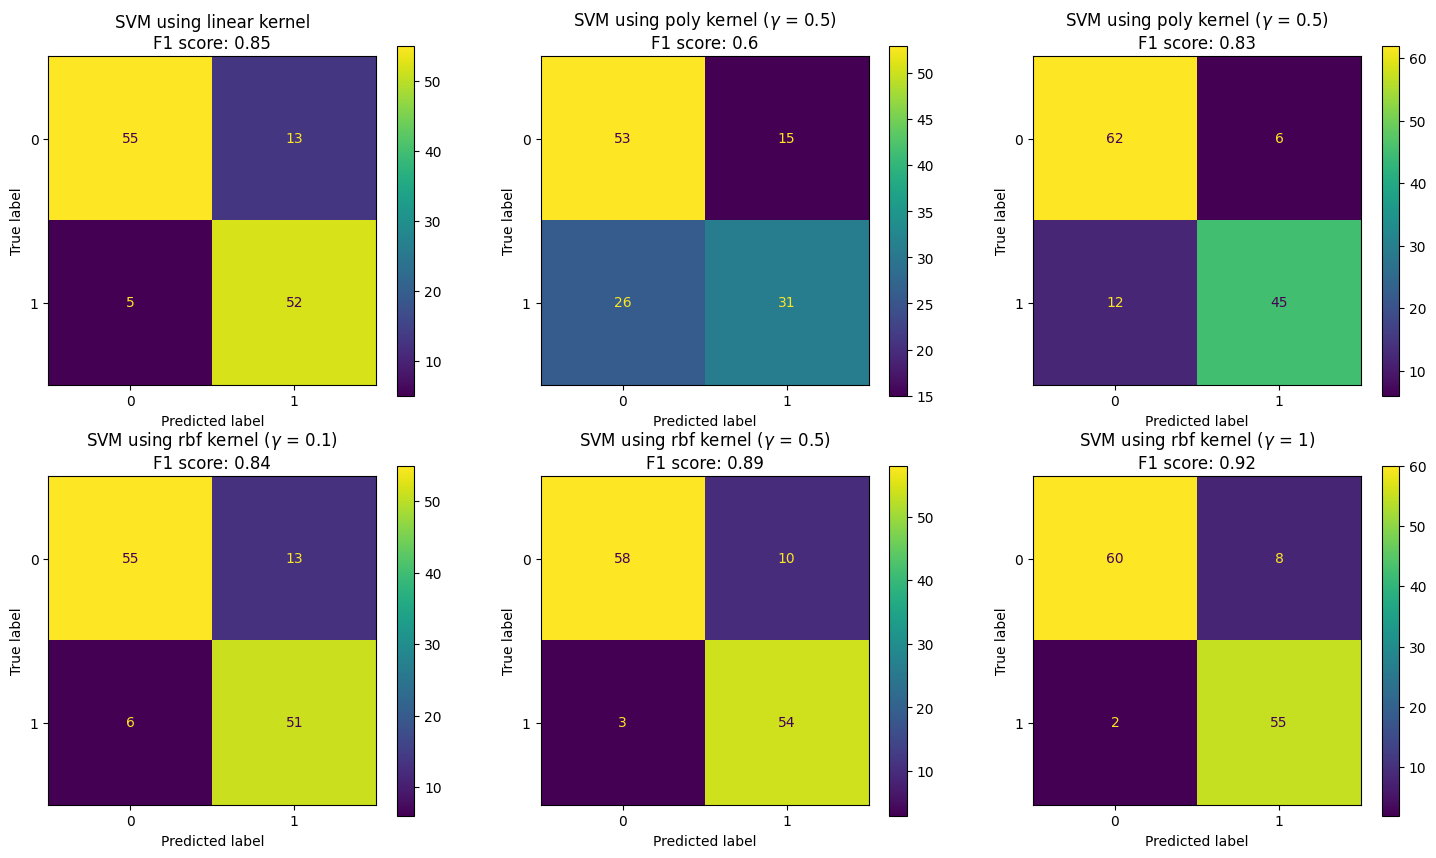

In [11]:
plot_confusion_matrices(cm_list, f1_list)

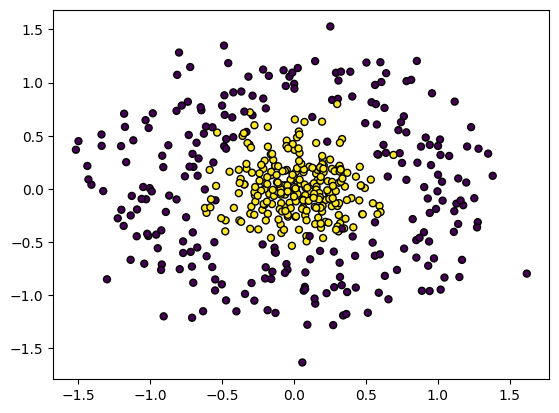

In [12]:
X, y = make_circles(n_samples = num_samples_total, noise = noise, factor = factor, random_state = random_state)
plt.scatter(X[:, 0], X[:,1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

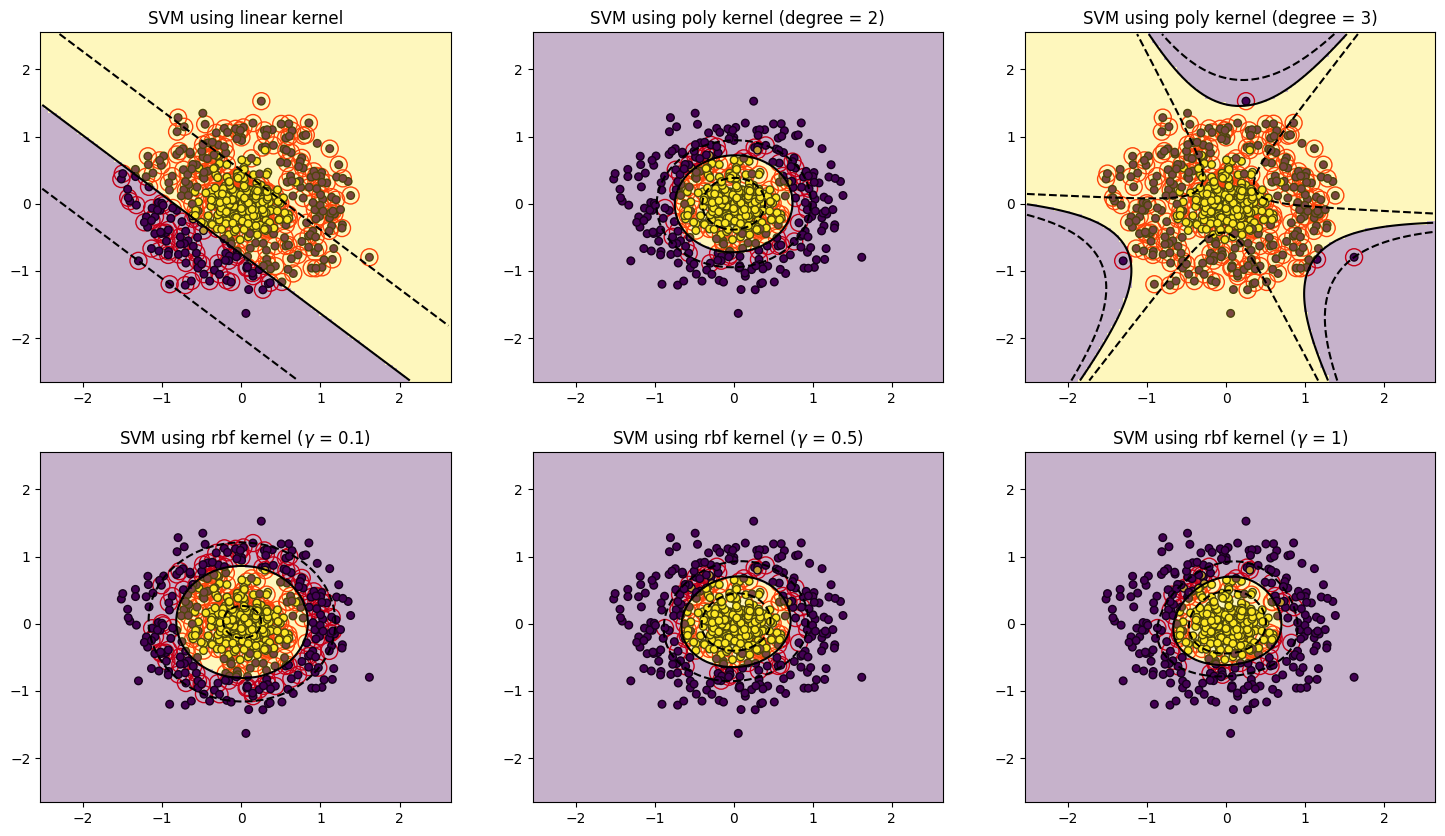

In [13]:
cm_list, f1_list = plot_decision_boundaries()

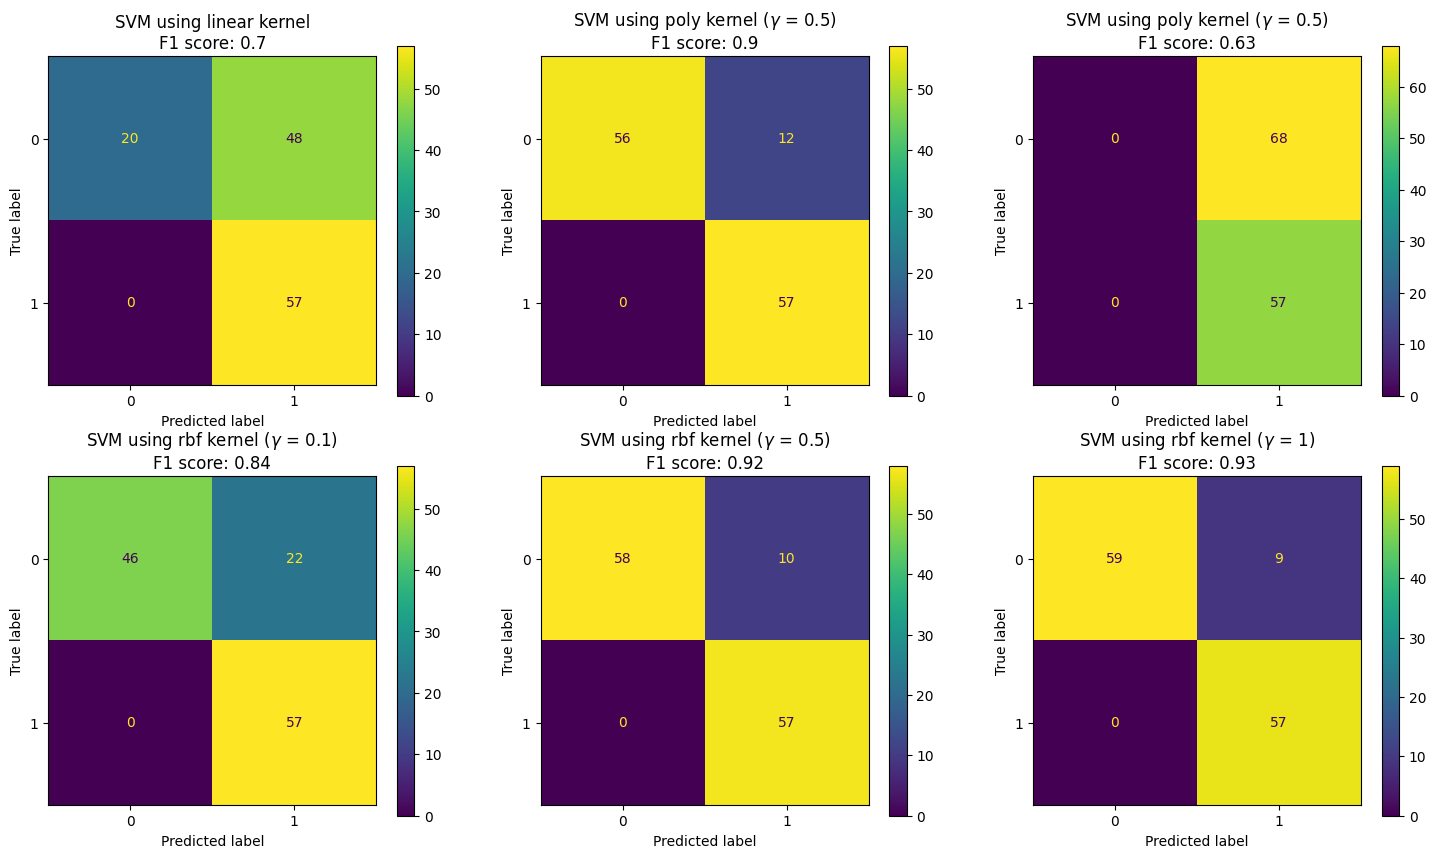

In [14]:
plot_confusion_matrices(cm_list, f1_list)